In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import csv
import pandas.util.testing as tm

import umap
#import DBSCAN

%matplotlib inline

C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [68]:
df_= pd.read_csv('..\Datos\processed\DATAFRAME.csv')
#df_= pd.read_csv('..\Datos\processed\sales_limpia.csv')

In [69]:
df_.head()

,Unnamed: 0,vat,Wristband_value,Wristband_quantity,RFID_value,RFID_quantity,Tickets_value,Tickets_quantity,CardPrinter_value,CardPrinter_quantity,...,provincia_Soria,provincia_Tarragona,provincia_Tenerife,provincia_Teruel,provincia_Toledo,provincia_Valencia,provincia_Valladolid,provincia_Zamora,provincia_Zaragoza,provincia_Ávila
0,0,00239342G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,00271666J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,00664054K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,00683789E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,00792540Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df = df_.drop(['vat','Unnamed: 0','Unnamed: 0.1',
 'CIF/NIF',
 'Nombre_einforma'], axis=1)
#df = df_.drop(['vat','Unnamed: 0'], axis=1)

In [71]:
list(df.columns)

['Wristband_value',
 'Wristband_quantity',
 'RFID_value',
 'RFID_quantity',
 'Tickets_value',
 'Tickets_quantity',
 'CardPrinter_value',
 'CardPrinter_quantity',
 'TouchScreen_value',
 'TouchScreen_quantity',
 'Card_value',
 'Card_quantity',
 'CardRibbon_value',
 'CardRibbon_quantity',
 'Mobile_value',
 'Mobile_quantity',
 'Scanner_value',
 'Scanner_quantity',
 'LabelPrinter_value',
 'LabelPrinter_quantity',
 'Label_value',
 'Label_quantity',
 'Ribbon_value',
 'Ribbon_quantity',
 'TicketPrinter_value',
 'TicketPrinter_quantity',
 'Printhead_value',
 'Printhead_quantity',
 'Accessories_value',
 'Accessories_quantity',
 'Actividad Informa_ Acabado de textiles',
 'Actividad Informa_ Acristalamiento y pintura',
 'Actividad Informa_ Activ. Anexas transporte terrestre',
 'Actividad Informa_ Actividades anexas al transporte marítimo y por vías navegables interiores',
 'Actividad Informa_ Actividades anexas artes graficas',
 'Actividad Informa_ Actividades asociativas',
 'Actividad Informa_ Ac

In [72]:
cifs = df.to_numpy()

In [73]:
reduce = umap.UMAP(random_state=42)
reduce.fit(cifs.data)

C:\Users\Usuario\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
C:\Users\Usuario\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [74]:
embedding = reduce.transform(cifs.data)

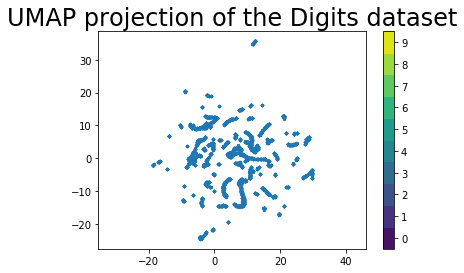

In [75]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42).fit(cifs.data)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [77]:
kmeans.predict(cifs.data)

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
kmeans.cluster_centers_[0]

array([ 1.93148036e-01,  1.20845921e-03,  3.33667523e+00,  2.50755287e-02,
        7.02672205e-01,  2.14803625e-01,  7.84765106e+00,  9.21450151e-03,
        7.12045317e+00,  1.40483384e-02,  9.34965257e-01,  2.16012085e-02,
        6.42154381e+00,  1.15407855e-01,  9.57121903e+00,  2.88519637e-02,
        8.31108248e+01,  5.73413897e-01,  6.04379789e+01,  1.27341390e-01,
        1.79826994e+01,  1.73119940e+00,  5.72285196e+00,  8.28247734e-01,
        8.88163897e+00,  3.51963746e-02,  9.96151964e+00,  3.77643505e-02,
        1.05830601e+02,  5.11682779e+00,  4.53172205e-04,  7.55287009e-04,
        1.35951662e-03,  6.04229607e-04,  3.02114804e-04,  4.53172205e-04,
        3.02114804e-04,  1.96374622e-03,  1.51057402e-04,  1.51057402e-04,
        1.51057402e-04,  1.51057402e-04,  9.06344411e-04,  9.06344411e-04,
        1.51057402e-04,  3.02114804e-04,  1.51057402e-04,  1.51057402e-04,
        4.53172205e-04,  3.02114804e-04,  1.51057402e-04,  3.32326284e-03,
        1.51057402e-04,  

In [79]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

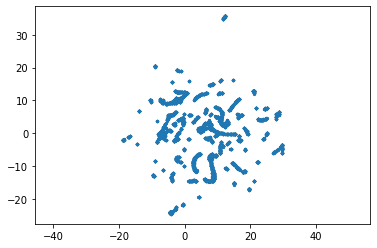

In [80]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')

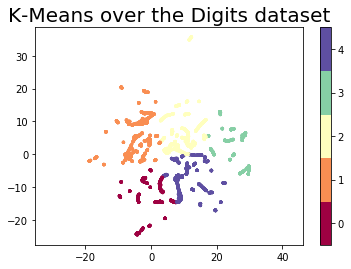

In [83]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=20);

In [64]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(embedding)

clustering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

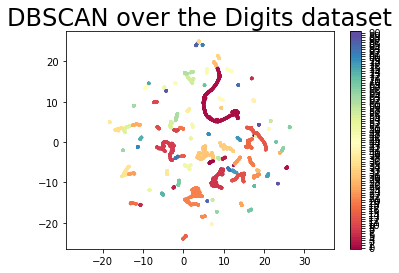

In [65]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

In [23]:
clusterer = hdbscan.HDBSCAN()

clusterer.fit(embedding)

clusterer

NameError: name 'hdbscan' is not defined

In [24]:
df_['cluster'] = clustering.labels_

In [25]:
df_.to_csv('..\Datos\processed\datos_finales.csv', index = False)